In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('Cleaned_Loaned.csv')

In [39]:
df.drop('Loan_ID',axis=1,inplace=True)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    225
Urban        198
Rural        175
Name: count, dtype: int64

In [42]:
df['Gender_Encode'] = df['Gender'].map({'Female':0,'Male':1})
df['Married_Encode'] = df['Married'].map({'No':0,'Yes':1})
df['Education_Encode'] = df['Education'].map({'Not Graduate':0,'Graduate':1})
df['Self_Employed_Encode'] = df['Self_Employed'].map({'No':0,'Yes':1})
df['Loan_Status_Encode'] = df['Loan_Status'].map({'N':0,'Y':1})

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
size_order = [['Rural','Semiurban','Urban']]
Encode = OrdinalEncoder(categories=size_order)
df['Property_Area_Encode'] = Encode.fit_transform(df[['Property_Area']])


In [45]:
df.drop(columns = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)

In [46]:
new_order = ['Gender_Encode', 'Married_Encode', 'Education_Encode', 'Self_Employed_Encode',
             'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
             'Credit_History', 'Property_Area_Encode', 'Loan_Status_Encode']

df = df[new_order]


In [47]:
df

,Gender_Encode,Married_Encode,Education_Encode,Self_Employed_Encode,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Encode,Loan_Status_Encode
0,1,0,1,0,0.0,5849,0.0,127.0,360.0,1.0,2.0,1
1,1,1,1,0,1.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1,1,1,1,0.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,1,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,1,0,1,0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,1,0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1
594,1,1,1,0,3.0,4106,0.0,40.0,180.0,1.0,0.0,1
595,1,1,1,0,1.0,8072,240.0,253.0,360.0,1.0,2.0,1
596,1,1,1,0,2.0,7583,0.0,187.0,360.0,1.0,2.0,1


In [48]:
df.to_csv('Encoded_Loan_Data.csv',index=False)

In [49]:
corr = df.corr()

<Axes: >

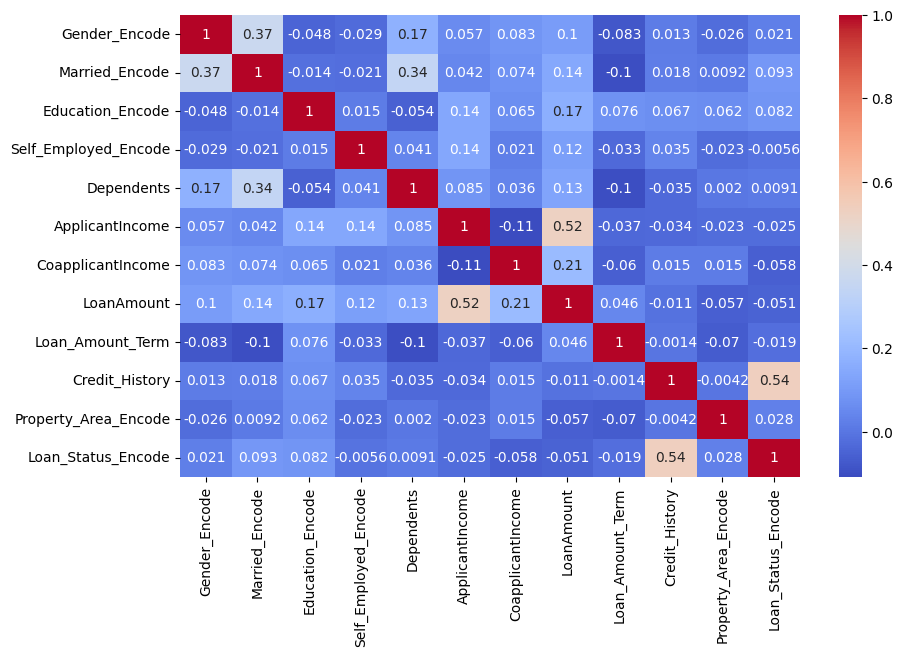

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")

<p>
Credit history is the most important single feature for loan approval prediction in your dataset. Other features have only a minor or negligible direct impact. For your model, prioritizing credit history will likely boost predictive power. Combining features may still uncover useful nonlinear patterns for machine learning.
    
</p>